**Kernel SVM Intuition**  

* SVM assumes data is linearly separable.  
* Kernel SVM helps to deal with this.  
* Take your data - add an extra dimension - and this makes your data linearly separable.  
* Kernel trick accomplishes the above without adding the extra dimensions.  
* Various kernels that can be sued.  

**Higher Dimensional Space**  
* Begin by looking at data in single dimension (on a line).  
* Use a point to separate classes in 1-D.  
* 1-D data is linearly separable if you can separate classes with a single point.  
* 2-D data is linearly separable if you can separate classes with a single line.  
* Example below shows moving from 1-D non-linearly separable to 2-D linearly separable.  
![](ksvm1.PNG)

![](ksvm2.PNG)

![](ksvm3.PNG)
![](ksvm4.PNG)

* Drawback of above approach is that this is highly computationally intensive.  
* Use kernel trick to address this issue.  

**Kernel Trick**  
* Gaussian Kernal = RBF (Radial Basis Function) Kernel  
* K(x,l^i) = exp[-(||x-l^i||^2/2sigmasquared)]  
![](gaussianrbf.PNG)  
![](gaussianrbf2.PNG)

* In the kernel equation - l is your landmark.  
* In the graph above - the landmark is on the lower blue plane at 0,0. 
* This is also the highest point of the vertical.  
* Vertical is result of the Kernel transformation function above.  
* The x - li is the distance from the point to the landmark.  
* Landmark vertical is 1 (e^0).  
![](ksvm5.PNG)

* Red dot above is the selected landmark.  
* Use sigma to adjust how wide the circle is.  
* Increase sigma - increases circumference - and vice versa.  
* Not actually going to the higher dimension - this is a visualization of the mapping.  

* You can use multiple landmarks to work with even more complicated data.  

**Types of Kernel Functions**  
* Gaussian RBF Kernel  
* Sigmoid Kernel 
* Polynomial Kernel  
* Others (the above are the most common)

**NON-LINEAR SVR (ADVANCED)**  
* Take your non-linear data and apply kernel (example is Gaussian RBF)  
* Obtain hyperplane that linearly separates mapped datapoints  
* Look at where hyperplane intersects with mapping  
* Project that back to 2-D space for your line of separation.  
* Use epsilon support hyperplanes to project epsilon support lines onto 2-D.  
* Not really going to additional dimension - just for illustrative purposes.  
* Kernel trick is a shortcut to stay in same space - less computationally intensive - gets to same point.  

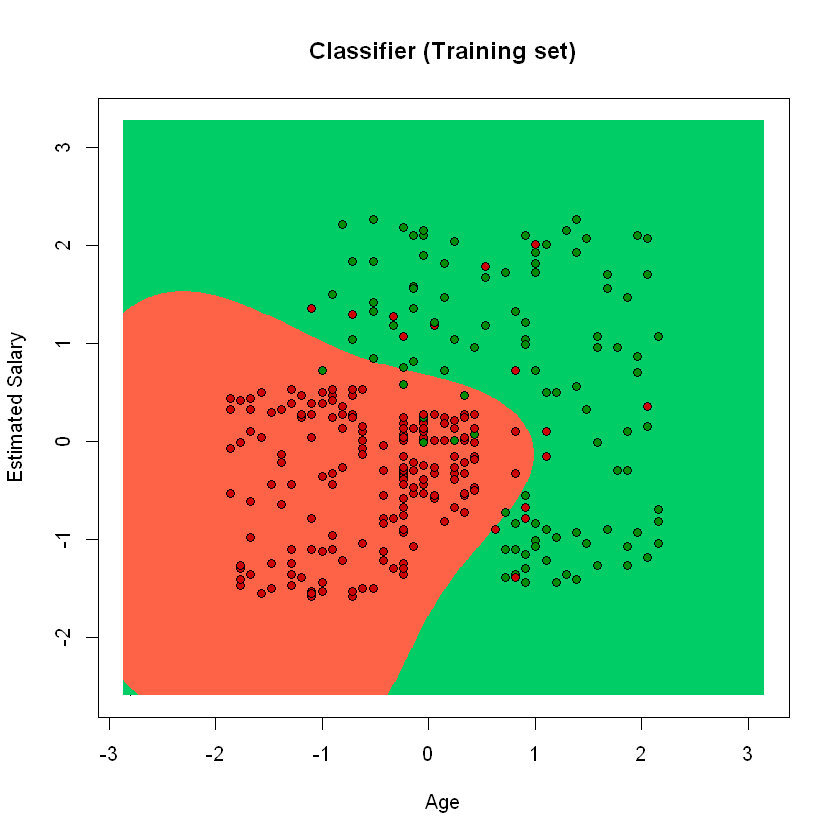

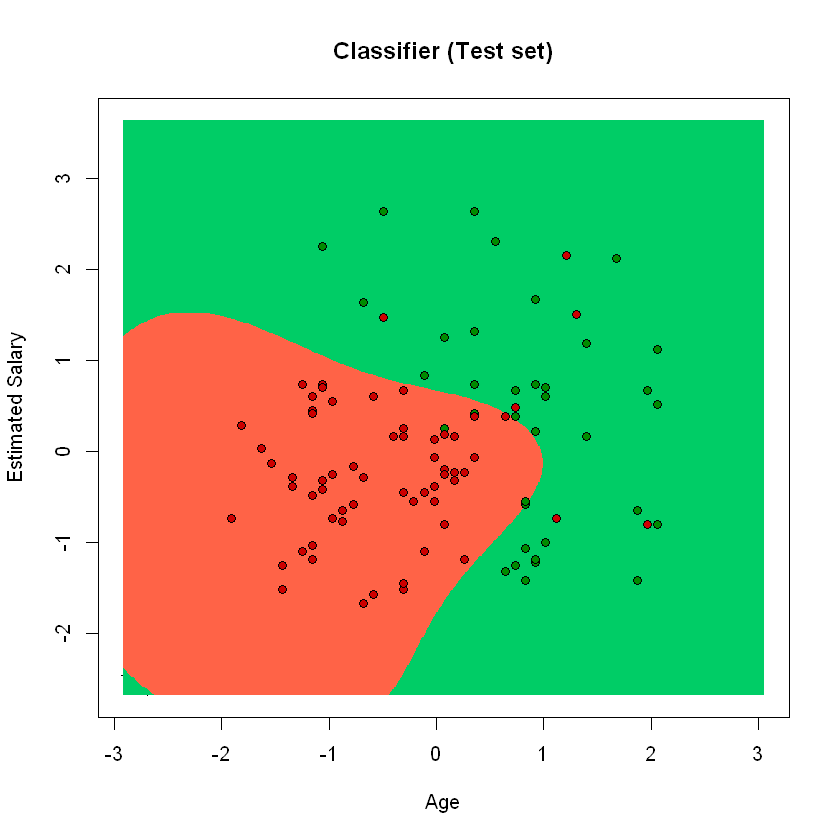

In [2]:
# Classification template

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

# Fitting kernel svm to the Training set
library(e1071)
classifier <- svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Classifier (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

In [3]:
cm

   y_pred
     0  1
  0 58  6
  1  4 32